In [4]:
import scvelo as scv
import os
import scanpy as sc
import numpy as np
import pandas as pd 
import scipy.sparse as sp
import anndata as ad
scv.logging.print_version()

In [5]:
print("The current work path is：", os.getcwd())# 当前工作目录

The current work path is： /home/yll/velocity_methods/01_analysis


In [3]:
# Load annotated binning data
data_path = "/home/yll/velocity_methods/dataset/scSTData/2023_Biorxiv_stereoseq_mousebrain/"

fname_bin60 = data_path + "mousebrain_bin60_clustered.h5ad"
adata_bin60 = sc.read_h5ad(fname_bin60)

# Load annotated cellbin data
fname_cellbin = data_path + "mousebrain_cellbin_clustered.h5ad"
adata_cellbin = sc.read_h5ad(fname_cellbin)

adata_bin60, adata_cellbin

(AnnData object with n_obs × n_vars = 7765 × 21667
     obs: 'area', 'n_counts', 'Size_Factor', 'initial_cell_size', 'louvain', 'scc', 'scc_anno'
     var: 'pass_basic_filter'
     uns: '__type', 'louvain', 'louvain_colors', 'neighbors', 'pp', 'scc', 'scc_anno_colors', 'scc_colors', 'spatial', 'spatial_neighbors'
     obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial'
     layers: 'count', 'spliced', 'unspliced'
     obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances',
 AnnData object with n_obs × n_vars = 11854 × 14645
     obs: 'area', 'pass_basic_filter', 'n_counts', 'louvain', 'Celltype'
     var: 'mt', 'pass_basic_filter'
     uns: 'Celltype_colors', '__type', 'louvain', 'neighbors', 'spatial'
     obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial'
     layers: 'count', 'spliced', 'unspliced'
     obsp: 'connectivities', 'distances')

In [5]:
adata_bin60.obs_names

Index(['10-41', '10-42', '10-43', '10-44', '10-45', '10-46', '10-47', '10-48',
       '10-49', '10-50',
       ...
       '99-84', '99-85', '99-86', '99-87', '99-88', '99-89', '99-9', '99-90',
       '99-91', '99-92'],
      dtype='object', length=7765)

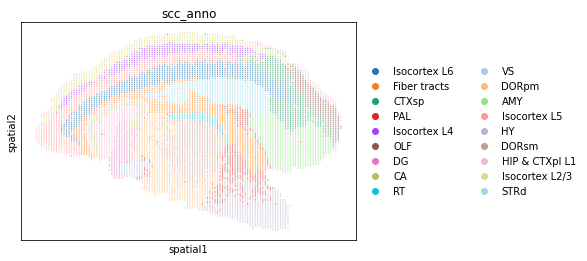

In [4]:
sc.pl.embedding(adata_bin60, basis="spatial", color="scc_anno",size=5)

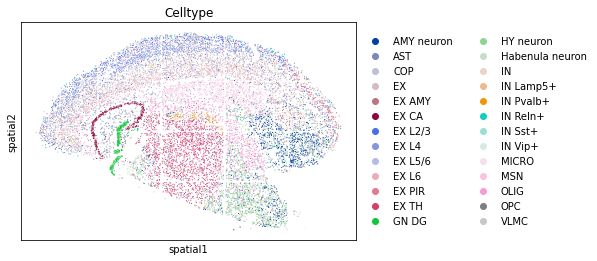

In [5]:
sc.pl.embedding(adata_cellbin, basis="spatial", color='Celltype',size=5)

In [4]:
adata_cellbin

AnnData object with n_obs × n_vars = 11854 × 14645
    obs: 'area', 'pass_basic_filter', 'n_counts', 'louvain', 'Celltype'
    var: 'mt', 'pass_basic_filter'
    uns: 'Celltype_colors', '__type', 'louvain', 'neighbors', 'spatial'
    obsm: 'X_pca', 'X_spatial', 'bbox', 'contour', 'spatial'
    layers: 'count', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

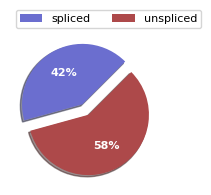

In [6]:
scv.pl.proportions(adata_bin60)

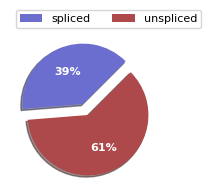

In [7]:
scv.pl.proportions(adata_cellbin)

In [11]:
save_path = "/home/yll/velocity_methods/01_analysis/apply_in_stereo_cortex/data/"

obs = pd.DataFrame(adata_cellbin.obs)
obs.to_csv(save_path + "cellbin_clustered_with_meta.csv")

loc = pd.DataFrame(adata_cellbin.obsm['X_spatial'])
loc.to_csv(save_path + "cellbin_clustered_with_loc.csv")

count = pd.DataFrame(adata_cellbin.X.todense())
count.to_csv(save_path + "cellbin_clustered_with_count.csv")

gene_id = pd.DataFrame(adata_cellbin.var_names)
gene_id.to_csv(save_path + "cellbin_clustered_with_gene.csv")

In [10]:
save_path = "/home/yll/velocity_methods/01_analysis/apply_in_stereo_cortex/data/"
obs = pd.DataFrame(adata_bin60.obs)
obs.to_csv(save_path + "bin60_clustered_with_meta.csv")

loc = pd.DataFrame(adata_bin60.obsm['X_spatial'])
loc.to_csv(save_path + "bin60_clustered_with_loc.csv")

count = pd.DataFrame(adata_bin60.X.todense())
count.to_csv(save_path + "bin60_clustered_with_count.csv")

gene_id = pd.DataFrame(adata_bin60.var_names)
gene_id.to_csv(save_path + "bin60_clustered_with_gene.csv")